In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np
from env import user,password,host
import os
import wrangle
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

import sklearn.preprocessing
from sklearn.model_selection import train_test_split


In [78]:
df = wrangle.get_zillow_data()

csv file found and loaded



In [79]:
df.columns


Index(['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet',
       'taxvaluedollarcnt', 'yearbuilt', 'taxamount', 'fips'],
      dtype='object')

In [80]:
wrangle.wrangle_zillow(df)

,bedrooms,bathrooms,area,taxvalue,yearbuilt,taxamount,county
4,4,2.0,3633,296425,2005,6941.39,LA
6,3,4.0,1620,847770,2011,10244.94,LA
7,3,2.0,2077,646760,1926,7924.68,LA
11,0,0.0,1200,5328,1972,91.60,LA
14,0,0.0,171,6920,1973,255.17,LA
...,...,...,...,...,...,...,...
2152857,4,4.0,4375,422400,2015,13877.56,LA
2152859,4,3.0,2262,960756,2015,13494.52,Orange
2152860,4,4.5,3127,536061,2014,6244.16,Orange
2152862,3,2.5,1974,424353,2015,5302.70,Orange


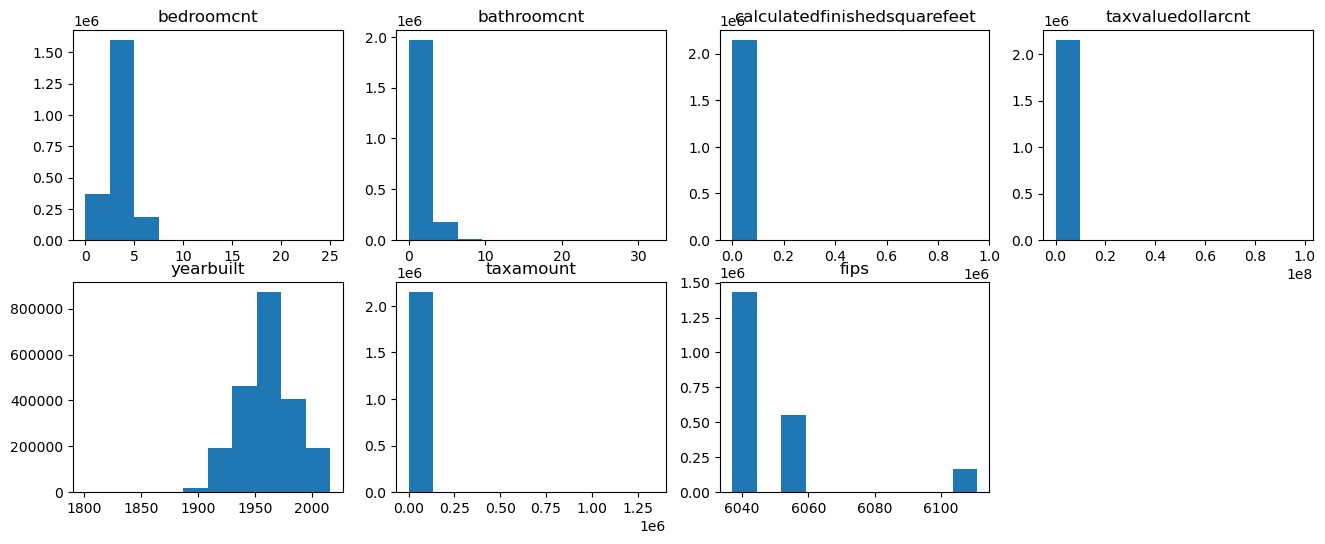

In [81]:
plt.figure(figsize=(16, 6))

for i, col in enumerate(df.columns):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(2, 4, plot_number)

    # Title with column name.
    plt.title(col)

    # Display boxplot for column.
    plt.hist(df[col])

plt.show()

In [82]:
train_validate, test = train_test_split(df, test_size=.2, random_state=123)
train, validate = train_test_split(train_validate, test_size=.25, random_state=123)

In [83]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1228108,3.0,2.0,1430.0,128137.0,1970.0,1826.74,6111.0
99712,3.0,1.0,1048.0,445000.0,1935.0,5611.39,6037.0
1637472,0.0,0.0,226.0,10352.0,1988.0,289.04,6037.0
1260731,3.0,1.0,1109.0,362762.0,1947.0,4392.99,6037.0
579338,2.0,1.0,1147.0,498000.0,1952.0,5950.70,6059.0


In [84]:
X_train, X_validate = train[['bedroomcnt', 'bathroomcnt','calculatedfinishedsquarefeet','yearbuilt','taxamount','fips']], validate[['bedroomcnt', 'bathroomcnt','calculatedfinishedsquarefeet','yearbuilt','taxamount','fips']]



In [85]:
X_train

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxamount,fips
1228108,3.0,2.0,1430.0,1970.0,1826.74,6111.0
99712,3.0,1.0,1048.0,1935.0,5611.39,6037.0
1637472,0.0,0.0,226.0,1988.0,289.04,6037.0
1260731,3.0,1.0,1109.0,1947.0,4392.99,6037.0
579338,2.0,1.0,1147.0,1952.0,5950.70,6059.0
...,...,...,...,...,...,...
330866,3.0,2.0,1174.0,1955.0,822.30,6059.0
841555,3.0,2.0,1264.0,1954.0,871.49,6037.0
943078,4.0,3.0,3197.0,1974.0,6815.09,6037.0
1486320,4.0,2.5,2173.0,1984.0,3980.96,6111.0


# 1.
Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution .

In [86]:
y_train, y_validate = train.taxvaluedollarcnt, validate.taxvaluedollarcnt

In [87]:
def visualize_scaler(scaler, df, columns_to_scale, bins=10):
    #create subplot structure
    fig, axs = plt.subplots(len(columns_to_scale), 2, figsize=(12,12))

    #copy the df for scaling
    df_scaled = df.copy()
    
    #fit and transform the df
    df_scaled[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

    #plot the pre-scaled data next to the post-scaled data in one row of a subplot
    for (ax1, ax2), col in zip(axs, columns_to_scale):
        ax1.hist(df[col], bins=bins)
        ax1.set(title=f'{col} before scaling', xlabel=col, ylabel='count')
        ax2.hist(df_scaled[col], bins=bins)
        ax2.set(title=f'{col} after scaling with {scaler.__class__.__name__}', xlabel=col, ylabel='count')
    plt.tight_layout()

In [89]:
to_scale = ['bedrooms','bathrooms','area','yearbuilt','taxamount']


KeyError: "['bedrooms', 'bathrooms', 'area'] not in index"

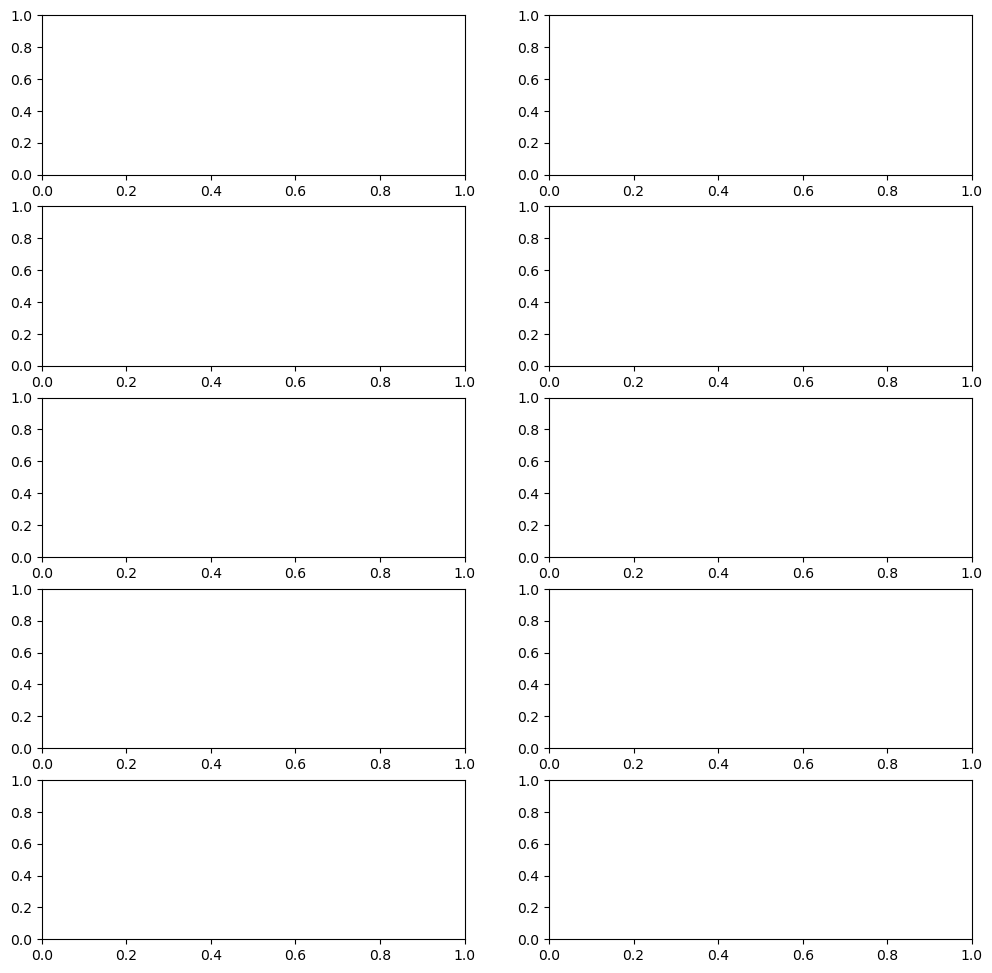

In [90]:
#MINMAX
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
#X_test_scaled = scaler.transform(X_test)

visualize_scaler(scaler=MinMaxScaler(), 
                 df=train, 
                 columns_to_scale=to_scale, 
                 bins=50)


Text(0.5, 1.0, 'Scaled')

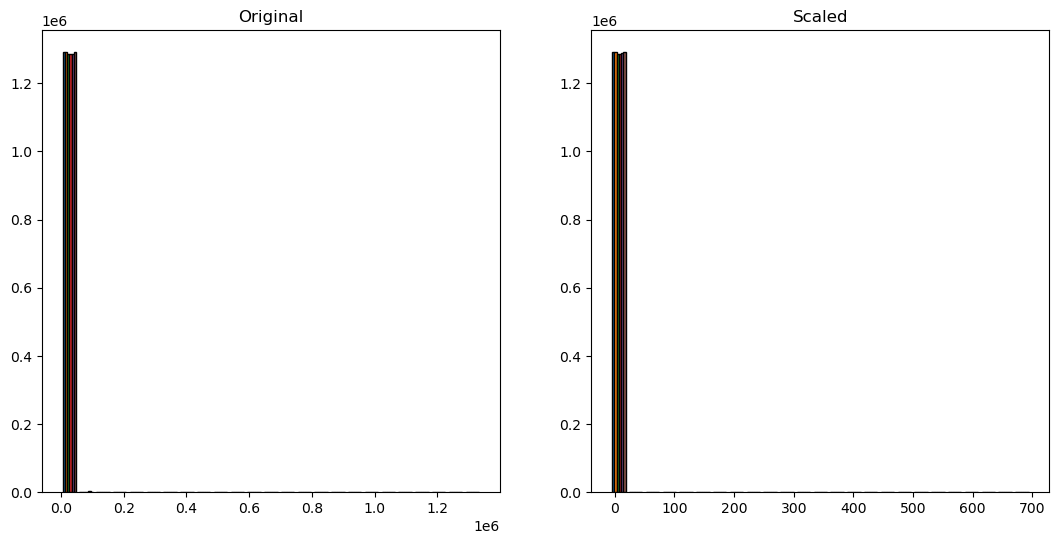

In [56]:
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
#X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

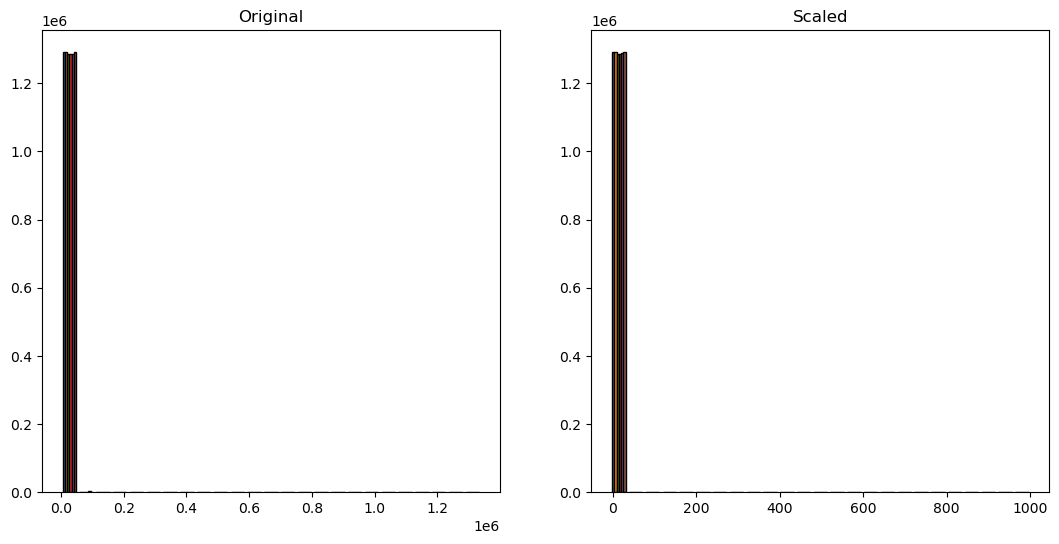

In [57]:
#Robust
scaler = sklearn.preprocessing.RobustScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_validate_scaled = scaler.transform(X_validate)
#X_test_scaled = scaler.transform(X_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

# 2.
Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

Text(0.5, 1.0, 'Scaled')

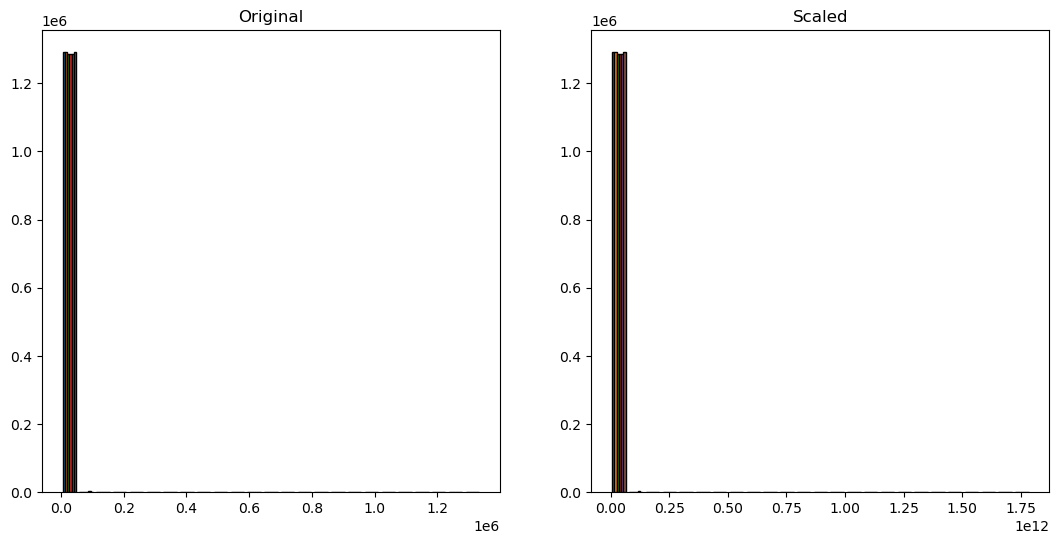

In [58]:
#inverse
#MINMAX
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train)

X_train_scaled = scaler.inverse_transform(X_train)
X_validate_scaled = scaler.inverse_transform(X_validate)
#X_test_scaled = scaler.inverse_transform(X_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')


Text(0.5, 1.0, 'Scaled')

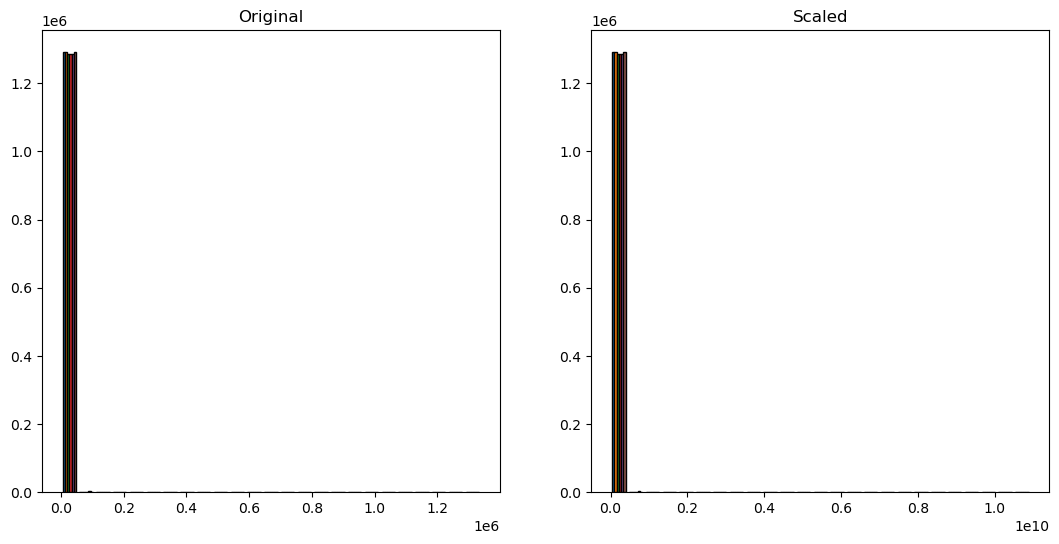

In [59]:

scaler = sklearn.preprocessing.StandardScaler()

# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train)

X_train_scaled = scaler.inverse_transform(X_train)
X_validate_scaled = scaler.inverse_transform(X_validate)
#X_test_scaled = scaler.inverse_transform(X_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

Text(0.5, 1.0, 'Scaled')

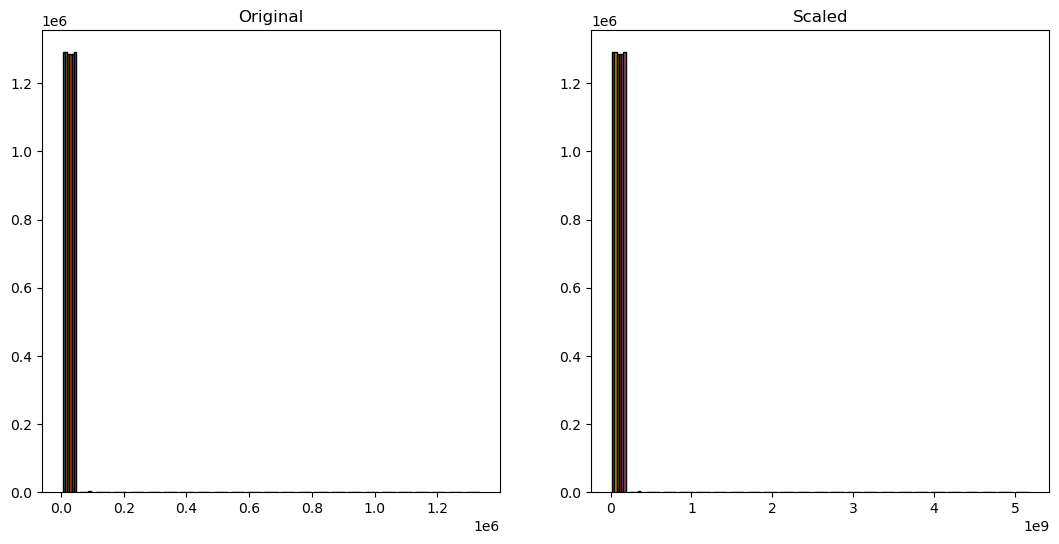

In [60]:
scaler = sklearn.preprocessing.RobustScaler()

# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(X_train)

X_train_scaled = scaler.inverse_transform(X_train)
X_validate_scaled = scaler.inverse_transform(X_validate)
#X_test_scaled = scaler.inverse_transform(X_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(X_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(X_train_scaled, bins=25, ec='black')
plt.title('Scaled')

# 3. 
Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.